In [1]:
import numpy as np 
import pandas as pd
import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [2]:
df = pd.read_csv("data_core.csv")

In [3]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26.0,52.0,38.0,Sandy,Maize,37,0,0,Urea
1,29.0,52.0,45.0,Loamy,Sugarcane,12,0,36,DAP
2,34.0,65.0,62.0,Black,Cotton,7,9,30,14-35-14
3,32.0,62.0,34.0,Red,Tobacco,22,0,20,28-28
4,28.0,54.0,46.0,Clayey,Paddy,35,0,0,Urea


In [6]:
import sklearn
print(sklearn.__version__)

1.6.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temparature      8000 non-null   float64
 1   Humidity         8000 non-null   float64
 2   Moisture         8000 non-null   float64
 3   Soil Type        8000 non-null   object 
 4   Crop Type        8000 non-null   object 
 5   Nitrogen         8000 non-null   int64  
 6   Potassium        8000 non-null   int64  
 7   Phosphorous      8000 non-null   int64  
 8   Fertilizer Name  8000 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 562.6+ KB


In [6]:
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [9]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temparature      8000 non-null   float64
 1   Humidity         8000 non-null   float64
 2   Moisture         8000 non-null   float64
 3   Soil Type        8000 non-null   object 
 4   Crop Type        8000 non-null   object 
 5   Nitrogen         8000 non-null   int64  
 6   Potassium        8000 non-null   int64  
 7   Phosphorous      8000 non-null   int64  
 8   Fertilizer Name  8000 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 562.6+ KB


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

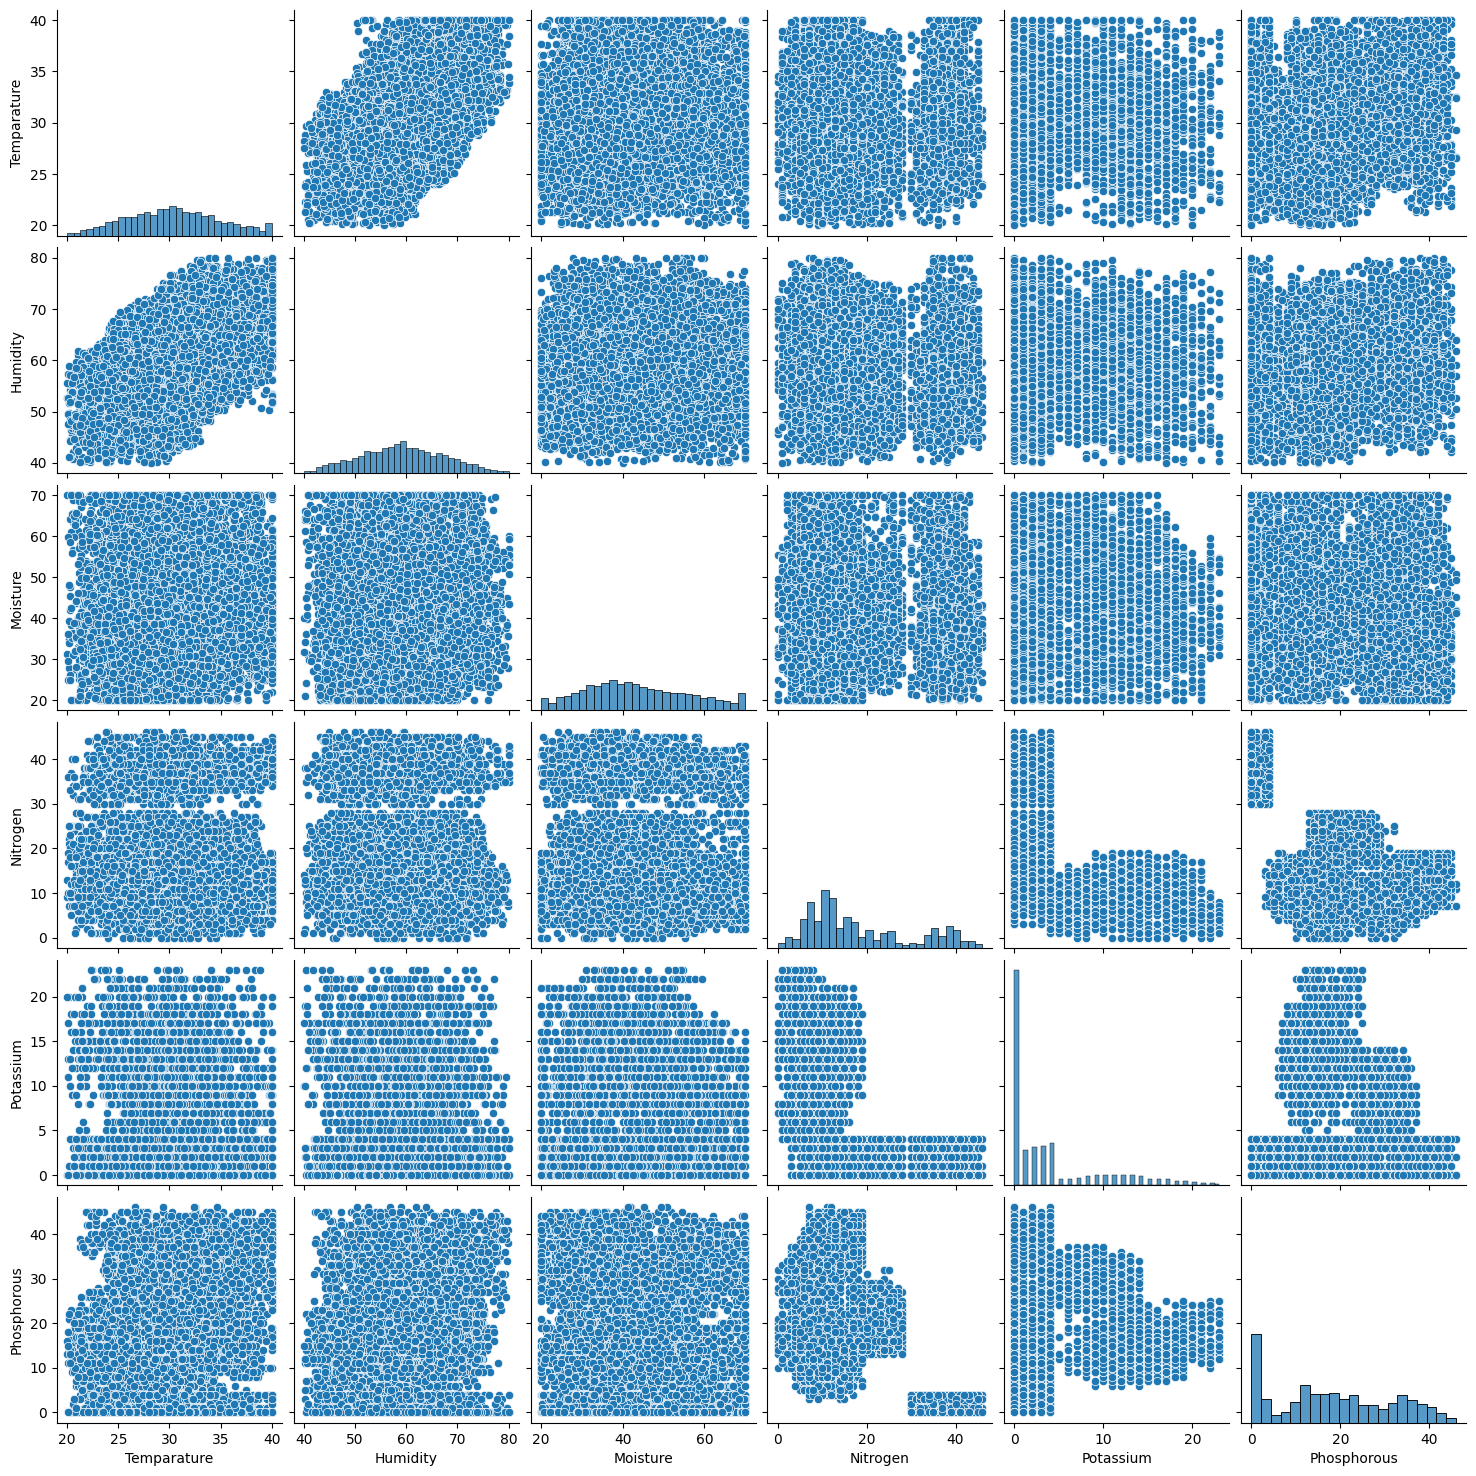

In [10]:
import seaborn as sns
sns.pairplot(df[num_cols])

In [12]:
obj_cols = [col for col in df.columns if df[col].dtype == 'object']

for col in obj_cols:
    print(df[col].value_counts())
    

Soil Type
Clayey    1623
Black     1613
Red       1594
Loamy     1590
Sandy     1580
Name: count, dtype: int64
Crop Type
Sugarcane      763
Maize          753
Wheat          747
Ground Nuts    732
Pulses         728
Cotton         722
Millets        718
Tobacco        717
Oil seeds      711
Paddy          706
Barley         703
Name: count, dtype: int64
Fertilizer Name
14-35-14    1188
Urea        1170
DAP         1167
10-26-26    1128
17-17-17    1124
28-28       1120
20-20       1103
Name: count, dtype: int64


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Nitrogen'],axis=1), df['Nitrogen'], test_size=0.33, random_state=4)

In [16]:
X_train.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Potassium,Phosphorous,Fertilizer Name
4729,33.00,57.63,37.28,Loamy,Cotton,0,16,Urea
6998,26.97,51.74,34.74,Red,Maize,0,3,Urea
3101,24.10,56.35,69.10,Red,Wheat,0,0,28-28
2614,34.65,60.23,61.23,Red,Ground Nuts,0,13,10-26-26
1639,39.61,73.34,50.25,Sandy,Oil seeds,0,4,Urea


In [11]:
X_train.shape

(5360, 8)

In [12]:
from sklearn.preprocessing import LabelEncoder
soil_enc = LabelEncoder()
X_train['Soil Type'] = soil_enc.fit_transform(X_train['Soil Type'])

In [13]:
crop_enc = LabelEncoder()
X_train['Crop Type'] = crop_enc.fit_transform(X_train['Crop Type'])

In [14]:
fer_enc = LabelEncoder()
X_train['Fertilizer Name'] = fer_enc.fit_transform(X_train['Fertilizer Name'])

In [15]:
X_train.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Potassium,Phosphorous,Fertilizer Name
4729,33.00,57.63,37.28,2,1,0,16,6
6998,26.97,51.74,34.74,3,3,0,3,6
3101,24.10,56.35,69.10,3,10,0,0,4
2614,34.65,60.23,61.23,3,2,0,13,0
1639,39.61,73.34,50.25,4,5,0,4,6


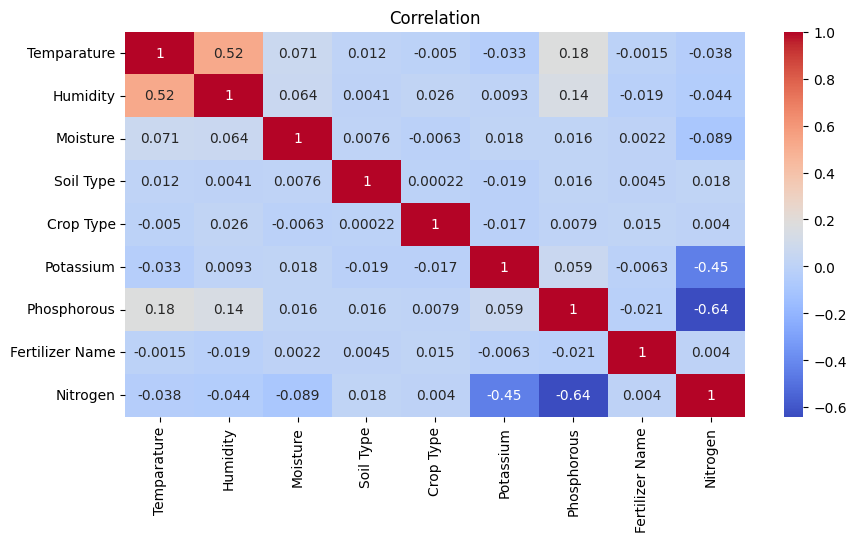

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.heatmap(pd.concat([X_train,y_train],axis=1).corr(),annot=True,cmap='coolwarm')
plt.title('Correlation')
plt.show()

In [29]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

In [31]:
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, verbosity=0),
    'LightGBM': LGBMRegressor(random_state=42)
}

scoring = 'neg_root_mean_squared_error'

results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring=scoring)
    results[name] = scores
    print(f"{name}: Mean CV Score = {np.mean(scores):.4f}, Std = {np.std(scores):.4f}")

RandomForest: Mean CV Score = -4.2868, Std = 0.1094
GradientBoosting: Mean CV Score = -4.3295, Std = 0.0861
XGBoost: Mean CV Score = -4.5849, Std = 0.1523
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003322 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 859
[LightGBM] [Info] Number of data points in the train set: 4288, number of used features: 8
[LightGBM] [Info] Start training from score 18.473881
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000271 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 859
[LightGBM] [Info] Number of data points in the train set: 4288, number of used feature

In [32]:
best_model_name = max(results, key=lambda k: np.mean(results[k]))
print(f"\nBest model: {best_model_name} with mean score {np.mean(results[best_model_name]):.4f}")


Best model: RandomForest with mean score -4.2868


In [16]:
X_test['Soil Type'] = soil_enc.transform(X_test['Soil Type'])
X_test['Crop Type'] = crop_enc.transform(X_test['Crop Type'])
X_test['Fertilizer Name'] = fer_enc.transform(X_test['Fertilizer Name'])

In [37]:
best_model = models[best_model_name]
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

In [17]:
from sklearn.metrics import r2_score, mean_absolute_error

In [40]:
print('r2score:',r2_score(y_test, y_pred))
print('mse:',mean_squared_error(y_test, y_pred))

r2score: 0.8794793206672219
mse: 17.02435772727273


In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

mod = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    estimator=mod,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error', 
    cv=5,
    n_jobs=-1,
    verbose=2
)

In [20]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [21]:
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV Score: {-grid_search.best_score_:.4f}")

grid_model = grid_search.best_estimator_

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Score: 4.2403


In [22]:
y_pred2 = grid_model.predict(X_test)

In [24]:
from sklearn.metrics import mean_squared_error
print('r2score:',r2_score(y_test, y_pred2))
print('mse:',mean_squared_error(y_test, y_pred2))

r2score: 0.8838894328678023
mse: 16.401399674466003


In [47]:
import joblib

In [25]:
joblib.dump(soil_enc, 'soil_enc.pkl')

['soil_enc.pkl']

In [26]:
joblib.dump(crop_enc, 'crop_enc.pkl')

['crop_enc.pkl']

In [27]:
joblib.dump(fer_enc, 'fer_enc.pkl')

['fer_enc.pkl']

In [28]:
joblib.dump(grid_model, 'grid_model.pkl')

['grid_model.pkl']

In [29]:
print(np.__version__)

1.26.4


In [30]:
print(pd.__version__)

2.2.3


In [31]:
import sklearn
print(sklearn.__version__)

1.6.0


In [32]:
import joblib
print(joblib.__version__)

1.4.2


In [33]:
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,30.338895,59.210731,43.580862,18.429125,3.916375,18.512500
std,4.478262,8.177366,12.596156,11.852406,5.494807,13.244113
min,20.000000,40.020000,20.000000,0.000000,0.000000,0.000000
25%,27.050000,53.277500,33.967500,9.000000,0.000000,8.000000
50%,30.240000,59.110000,42.250000,14.000000,1.000000,18.000000
75%,33.460000,65.082500,52.950000,26.000000,5.000000,30.000000
max,40.000000,80.000000,70.000000,46.000000,23.000000,46.000000
